In [15]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [44]:


pit_agrs_transplant_25_60k = pd.read_csv('../cass_exp/aug23/pit60k_25/pit_60_merge_agrs.csv', header = 2)

pit_agrs_transplant_25_60k.sort_values(by='step', inplace=True)

step_sums = dict() 
# {key: (reward_sum, count, length_of_run) }

for index, row, in pit_agrs_transplant_25_60k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']
        

# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length'])


for key, value in step_sums.items():
    
    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]
    
    
    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)
df_av_at_step.set_index('step')


rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span = 1000).std()
rolling

df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']

df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_agrs = df_av_at_step
df_agrs

,step,reward,length,reward_se,length_se
0,0.0,0.120000,451.080000,0.000000,0.000000
1,76.0,0.059940,475.564460,0.084853,34.591664
2,93.0,0.373920,354.133850,0.546317,211.427160
3,108.0,0.530910,296.678422,0.544945,207.178626
4,205.0,0.424303,337.505558,0.528246,201.128736
...,...,...,...,...,...
2542,59944.0,0.665671,228.101875,0.468771,194.989464
2543,59947.0,0.666343,227.786036,0.468539,194.920553
2544,59958.0,0.667014,227.438670,0.468307,194.878420
2545,59992.0,0.667683,227.105074,0.468074,194.824409


In [45]:
pit_no_agrs_transplant_25_60k = pd.read_csv('../cass_exp/aug23/pit60k_25/pit_60_merge_no_agrs.csv', header = 2)

pit_no_agrs_transplant_25_60k.sort_values(by='step', inplace=True)

#PIPELINE FOR AVERAGE OF MOVING AVERAGES

step_sums = dict() 
# {key: (reward_sum, count, length_of_run) }

for index, row, in pit_no_agrs_transplant_25_60k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']
        
# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length']);df_av_at_step

for key, value in step_sums.items():
    
    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]
    
    
    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)

df_av_at_step.set_index('step')

rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span=1000).std()
df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']


df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_no_agrs = df_av_at_step
df_no_agrs

,step,reward,length,reward_se,length_se
0,0.0,0.040000,483.680000,0.000000,0.000000
1,92.0,0.019980,491.848160,0.028284,11.539983
2,500.0,0.041140,483.590619,0.041699,16.445898
3,592.0,0.030824,487.705280,0.039775,15.734768
4,595.0,0.024635,490.174069,0.037093,14.690954
...,...,...,...,...,...
2198,59846.0,0.322203,384.100128,0.465719,170.342161
2199,59893.0,0.322562,383.938099,0.465316,170.207874
2200,59975.0,0.323933,383.392072,0.465841,170.468072
2201,59979.0,0.325300,382.944254,0.466361,170.586128


In [46]:
pit_agrs_no_transplant_25_60k = pd.read_csv('../cass_exp/aug23/pit60k_25/pit_60_merge_agrs_no_t.csv', header = 2)

pit_agrs_no_transplant_25_60k.sort_values(by='step', inplace=True)

#PIPELINE FOR AVERAGE OF MOVING AVERAGES

step_sums = dict()
# {key: (reward_sum, count, length_of_run) }

for index, row, in pit_agrs_no_transplant_25_60k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']

# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length']);df_av_at_step

for key, value in step_sums.items():

    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]


    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)

df_av_at_step.set_index('step')

rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span=1000).std()
df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']


df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_agrs_no = df_av_at_step
df_agrs_no


,step,reward,length,reward_se,length_se
0,0.0,0.038462,484.653846,0.000000,0.000000
1,101.0,0.019212,492.334596,0.027196,10.851369
2,500.0,0.012795,494.894843,0.022195,8.855673
3,601.0,0.009587,496.174963,0.019212,7.665400
4,1000.0,0.015694,493.786445,0.021496,8.509267
...,...,...,...,...,...
1795,59941.0,0.534432,306.693452,0.497040,184.189848
1796,59962.0,0.533334,307.090595,0.497119,184.208822
1797,59964.0,0.534293,306.636396,0.497058,184.291874
1798,59998.0,0.535250,306.470749,0.496995,184.138712


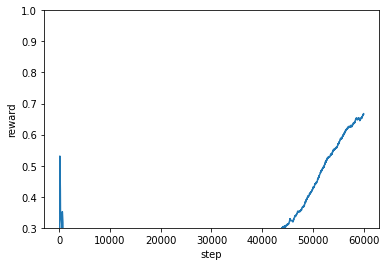

In [47]:
plt.ylim(0.3, 1)
sns.lineplot(x="step", y="reward", data=df_agrs)

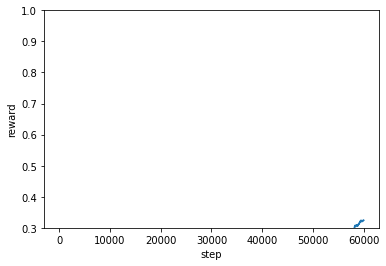

In [48]:
plt.ylim(0.3, 1)
sns.lineplot(x="step", y="reward", data=df_no_agrs)

In [49]:

pal = sns.color_palette('deep')
pal.as_hex()

['#4c72b0',
 '#dd8452',
 '#55a868',
 '#c44e52',
 '#8172b3',
 '#937860',
 '#da8bc3',
 '#8c8c8c',
 '#ccb974',
 '#64b5cd']

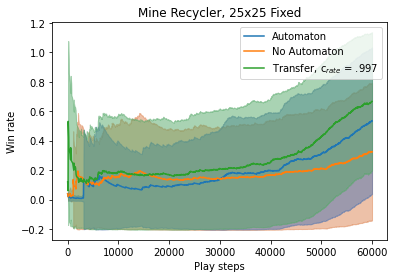

In [50]:
fig, axs = plt.subplots(ncols=1)
plt.title('Mine Recycler, 25x25 Fixed')

sns.lineplot(x="step", y="reward", data=df_agrs_no,ax=axs, ci=99)
sns.lineplot(x="step", y="reward", data=df_no_agrs,ax=axs, ci=99)
sns.lineplot(x="step", y="reward", data=df_agrs,ax=axs, ci=99)

axs.fill_between(x=df_no_agrs["step"], y1=df_no_agrs["reward"] + df_no_agrs["reward_se"], 
                 y2=df_no_agrs["reward"] - df_no_agrs["reward_se"], alpha=.5, color='#dd8452')
axs.fill_between(x=df_agrs_no["step"], y1=df_agrs_no["reward"] + df_agrs_no["reward_se"], 
                 y2=df_agrs_no["reward"] - df_agrs_no["reward_se"], alpha=.5, color='#4c72b0')

axs.fill_between(x=df_agrs["step"], y1=df_agrs["reward"] + df_agrs["reward_se"], 
                 y2=df_agrs["reward"] - df_agrs["reward_se"], alpha=.5, color='#55a868')
axs.set(xlabel='Play steps', ylabel='Win rate')

axs.legend(['Automaton', 'No Automaton', 'Transfer, c$_{rate}$ = .997'], loc=1)

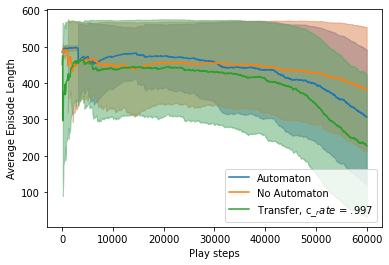

In [55]:
fig, axs = plt.subplots(ncols=1)
#plt.title('Pit transplant 25 * 60k steps at 80 expansions')

sns.lineplot(x="step", y="length", data=df_agrs_no,ax=axs, ci=99)
sns.lineplot(x="step", y="length", data=df_no_agrs,ax=axs, ci=99)
sns.lineplot(x="step", y="length", data=df_agrs,ax=axs, ci=99)
axs.fill_between(x=df_agrs_no["step"], y1=df_agrs_no["length"] + df_agrs_no["length_se"], 
                 y2=df_agrs_no["length"] - df_agrs_no["length_se"], alpha=.5, color='#4c72b0')
axs.fill_between(x=df_no_agrs["step"], y1=df_no_agrs["length"] + df_no_agrs["length_se"], 
                 y2=df_no_agrs["length"] - df_no_agrs["length_se"], alpha=.5, color='#dd8452')


axs.fill_between(x=df_agrs["step"], y1=df_agrs["length"] + df_agrs["length_se"], 
                 y2=df_agrs["length"] - df_agrs["length_se"], alpha=.5, color='#55a868')

axs.set(xlabel='Play steps', ylabel='Average Episode Length')
axs.legend(['Automaton','No Automaton', 'Transfer, c_$_rate$ = .997'], loc=4)